### 여러 개의 데이터 셋을 합치고 처리하기

### 참고 사이트 
* our world in data
  * https://ourworldindata.org/covid-vaccinations
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [1]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 불러오기

In [2]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '2021-07-02_corona_pre.csv',
 '2021-07-06_corona_pre.csv',
 '2021-07-07_corona_pre.csv',
 '2021-07-11_corona_pre.csv',
 '2021-07-12_corona_pre.csv',
 '2021-07-12_corona_pre.xlsx',
 '2021-07-12_corona_데이터.csv',
 '2021-07-12_corona_데이터.xlsx',
 '2021_0703_01_vaccine_bloomberg.csv',
 '2021_0707_23_vaccine_bloomberg.csv',
 '2021_0708_09_vaccine_bloomberg.csv',
 '2021_0712_19_vaccine_bloomberg.csv',
 '2021_0713_02_vaccine_bloomberg.csv',
 '2021_0713_02_vaccine_bloomberg.xlsx',
 'corona_0712.zip',
 'country.csv',
 'country.xlsx',
 'debug.log',
 'today_corona.csv',
 'today_corona_pre.csv',
 'unit12_corona_01_today.html',
 'unit12_corona_01_today.ipynb',
 'unit12_corona_02_today.html',
 'unit12_corona_02_today.ipynb',
 'unit12_corona_02_today.pdf',
 'unit12_corona_03_vaccine.html',
 'unit12_corona_03_vaccine.ipynb',
 'unit12_corona_04_vaccine_bloomberg.html',
 'unit12_corona_04_vaccine_bloomberg.ipynb',
 'unit12_corona_04_vaccine_bloomberg.pdf',
 'unit12_corona_05_vaccin

In [3]:
import pandas as pd


corona = pd.read_csv("2021-07-12_corona_데이터.csv")
vaccine = pd.read_csv("2021_0713_02_vaccine_bloomberg.csv")
country_code = pd.read_excel("country.xlsx")

corona.shape, vaccine.shape, country_code.shape

((221, 12), (203, 6), (227, 4))

In [4]:
corona.head()

,국가,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0
1,인도🇮🇳,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0
2,브라질🇧🇷,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0
3,프랑스🇫🇷,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0
4,러시아🇷🇺,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0


In [5]:
vaccine.head()

,country,Doses_administered,percent_of_people:,1_per,2_per,Daily_rate_of_doses_administered
0,Global Total,3.413652e+09,-999.0,-999.0,-999.0,31963812.0
1,Mainland China,1.374162e+09,49.1,-999.0,-999.0,11160714.0
2,EU,4.047617e+08,45.6,54.0,39.5,3628874.0
3,India,3.792972e+08,13.9,22.2,5.3,4010835.0
4,U.S.,3.341516e+08,52.2,55.5,48.0,506771.0


In [6]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


### 코로나에 나라명이 있으면 해당되는 열을 붙여라

In [7]:
corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)')

,0
0,미국
1,인도
2,브라질
3,프랑스
4,러시아
...,...
216,마셜
217,바누아투
218,사모아
219,세인트헬레나


In [8]:
corona['hangul_code'] = corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)', expand=False)
corona.columns

Index(['국가', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', 'hangul_code'],
      dtype='object')

In [9]:
col = ['국가', 'hangul_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일']
new_corona = corona[col].copy()
new_corona



,국가,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0
1,인도🇮🇳,인도,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0
2,브라질🇧🇷,브라질,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0
3,프랑스🇫🇷,프랑스,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0
4,러시아🇷🇺,러시아,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,마셜 제도🇲🇭,마셜,NaN,-,100.0,68,59190,4,NaN,0,NaN,4.0,NaN
217,바누아투🇻🇺,바누아투,NaN,25,75.0,13,307145,4,NaN,1,NaN,3.0,NaN
218,사모아🇼🇸,사모아,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN
219,세인트헬레나🇸🇭,세인트헬레나,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN


### 두 데이터 셋 연결

In [10]:
new_corona.head()

,국가,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0
1,인도🇮🇳,인도,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0
2,브라질🇧🇷,브라질,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0
3,프랑스🇫🇷,프랑스,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0
4,러시아🇷🇺,러시아,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0


In [11]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [12]:
country_code.columns = ['han_code', 'eng_code', 'country', 'etc']
country_code.head()

,han_code,eng_code,country,etc
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [13]:
df_corona = new_corona.merge(country_code, left_on='hangul_code', 
                             right_on='han_code')
df_corona.head()

,국가,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,han_code,eng_code,country,etc
0,미국🇺🇸,미국,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0,미국,U.S.,NaN,NaN
1,인도🇮🇳,인도,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0,인도,India,NaN,NaN
2,브라질🇧🇷,브라질,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0,브라질,Brazil,NaN,NaN
3,프랑스🇫🇷,프랑스,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0,프랑스,France,NaN,NaN
4,러시아🇷🇺,러시아,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0,러시아,Russia,NaN,NaN


In [14]:
df_corona.drop(['국가', 'han_code', 'country', 'etc'], axis=1, inplace=True)
df_corona.head()

,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code
0,미국,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0,U.S.
1,인도,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0,India
2,브라질,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0,Brazil
3,프랑스,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0,France
4,러시아,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0,Russia


In [15]:
vaccine.head()

,country,Doses_administered,percent_of_people:,1_per,2_per,Daily_rate_of_doses_administered
0,Global Total,3.413652e+09,-999.0,-999.0,-999.0,31963812.0
1,Mainland China,1.374162e+09,49.1,-999.0,-999.0,11160714.0
2,EU,4.047617e+08,45.6,54.0,39.5,3628874.0
3,India,3.792972e+08,13.9,22.2,5.3,4010835.0
4,U.S.,3.341516e+08,52.2,55.5,48.0,506771.0


In [16]:
df_corona_all = df_corona.merge(vaccine, left_on='eng_code', right_on='country')
df_corona_all.head()

,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code,country,Doses_administered,percent_of_people:,1_per,2_per,Daily_rate_of_doses_administered
0,미국,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0,U.S.,U.S.,334151650.0,52.2,55.5,48.0,506771.0
1,인도,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0,India,India,379297150.0,13.9,22.2,5.3,4010835.0
2,브라질,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0,Brazil,Brazil,114247770.0,27.9,41.2,14.5,1356589.0
3,프랑스,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0,France,France,60532500.0,46.7,55.2,42.2,566156.0
4,러시아,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0,Russia,Russia,45000000.0,15.3,20.4,10.2,700000.0


In [17]:
df_corona_all.drop(['country'], axis=1, inplace=True)
df_corona_all

,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code,Doses_administered,percent_of_people:,1_per,2_per,Daily_rate_of_doses_administered
0,미국,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0,U.S.,334151650.0,52.2,55.5,48.0,506771.0
1,인도,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0,India,379297150.0,13.9,22.2,5.3,4010835.0
2,브라질,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0,Brazil,114247770.0,27.9,41.2,14.5,1356589.0
3,프랑스,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0,France,60532500.0,46.7,55.2,42.2,566156.0
4,러시아,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0,Russia,45000000.0,15.3,20.4,10.2,700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,NaN,-,96.4,85,649335,55,NaN,0,NaN,53.0,NaN,Macau,412135.0,30.3,38.4,22.4,6311.0
174,몬트세랫,NaN,5,95.0,4006,4992,20,NaN,1,NaN,19.0,NaN,Montserrat,2651.0,26.5,28.4,24.7,2.0
175,사모아,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,Samoa,56994.0,14.2,25.2,-999.0,883.0
176,세인트헬레나,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,St. Helena,7091.0,59.1,59.4,58.8,120.0


In [18]:
df_corona_all.columns

Index(['hangul_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', 'eng_code', 'Doses_administered',
       'percent_of_people:', '1_per', '2_per',
       'Daily_rate_of_doses_administered'],
      dtype='object')

In [19]:
sel = ['hangul_code', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', 'Doses_administered',
       'percent_of_people:', '1_per', '2_per',
       'Daily_rate_of_doses_administered' ]
df_corona_all_n = df_corona_all[sel].copy()
df_corona_all_n

,hangul_code,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,Doses_administered,percent_of_people:,1_per,2_per,Daily_rate_of_doses_administered
0,미국,U.S.,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0,334151650.0,52.2,55.5,48.0,506771.0
1,인도,India,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0,379297150.0,13.9,22.2,5.3,4010835.0
2,브라질,Brazil,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0,114247770.0,27.9,41.2,14.5,1356589.0
3,프랑스,France,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0,60532500.0,46.7,55.2,42.2,566156.0
4,러시아,Russia,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0,45000000.0,15.3,20.4,10.2,700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,96.4,85,649335,55,NaN,0,NaN,53.0,NaN,412135.0,30.3,38.4,22.4,6311.0
174,몬트세랫,Montserrat,NaN,5,95.0,4006,4992,20,NaN,1,NaN,19.0,NaN,2651.0,26.5,28.4,24.7,2.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,56994.0,14.2,25.2,-999.0,883.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7091.0,59.1,59.4,58.8,120.0


In [20]:
df_corona_all_n.columns

Index(['hangul_code', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수',
       '확진자_합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일',
       'Doses_administered', 'percent_of_people:', '1_per', '2_per',
       'Daily_rate_of_doses_administered'],
      dtype='object')

In [21]:
df_corona_all_n.columns = ['국가명', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일','백신접종', '접종률(인구)', '1차접종', '2차접종',
       '접종비율(일간)']
df_corona_all_n

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간)
0,미국,U.S.,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0,334151650.0,52.2,55.5,48.0,506771.0
1,인도,India,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0,379297150.0,13.9,22.2,5.3,4010835.0
2,브라질,Brazil,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0,114247770.0,27.9,41.2,14.5,1356589.0
3,프랑스,France,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0,60532500.0,46.7,55.2,42.2,566156.0
4,러시아,Russia,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0,45000000.0,15.3,20.4,10.2,700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,96.4,85,649335,55,NaN,0,NaN,53.0,NaN,412135.0,30.3,38.4,22.4,6311.0
174,몬트세랫,Montserrat,NaN,5,95.0,4006,4992,20,NaN,1,NaN,19.0,NaN,2651.0,26.5,28.4,24.7,2.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,56994.0,14.2,25.2,-999.0,883.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7091.0,59.1,59.4,58.8,120.0


In [22]:
df_corona_all_n.sort_values(['접종률(인구)'], ascending=False)

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간)
157,지브롤터,Gibraltar,NaN,2.1,95.9,131697,33691,4437,7.0,94,NaN,4254.0,NaN,78125.0,114.90,115.50,114.30,7.0
38,아랍에미레이트,UAE,NaN,0.3,96.6,65898,9890402,651762,1542.0,1870,4.0,629809.0,1519.0,15934124.0,74.10,69.40,60.40,57131.0
128,세이셸,Seychelles,NaN,0.4,93.2,169593,98347,16679,NaN,74,NaN,15541.0,NaN,139625.0,72.70,74.50,71.00,130.0
70,바레인,Bahrain,34\n-10,0.5,99.1,157038,1701575,267212,100.0,1377,1.0,264687.0,199.0,2104071.0,70.90,73.10,68.70,5140.0
104,몰디브,Maldives,21,0.3,96.4,138880,540544,75071,78.0,214,1.0,72349.0,231.0,517333.0,69.50,85.40,53.70,1586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,부르키나파소,Burkina Faso,NaN,1.2,98.6,646,20903273,13509,3.0,168,NaN,13317.0,NaN,25833.0,0.10,0.10,-999.00,620.0
83,알제리,Algeria,39\n-10,2.6,69.4,3331,43851044,146064,768.0,3836,12.0,101430.0,519.0,75000.0,0.10,-999.00,-999.00,6248.0
156,차드,Chad,NaN,3.5,96.4,302,16425864,4954,NaN,174,NaN,4777.0,NaN,14604.0,0.05,0.10,0.05,686.0
113,콩고민주공화국,DR Congo,NaN,2.2,64.9,495,89561403,44139,NaN,980,NaN,28630.0,NaN,65567.0,0.05,0.10,-999.00,875.0


In [23]:
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가명       178 non-null    object 
 1   eng_code  178 non-null    object 
 2   위중증       126 non-null    object 
 3   치명(%)     178 non-null    object 
 4   완치(%)     175 non-null    float64
 5   발생률       178 non-null    object 
 6   인구수       178 non-null    object 
 7   확진자_합계    178 non-null    int64  
 8   확진자1일     129 non-null    float64
 9   사망자합계     178 non-null    int64  
 10  사망자1일     95 non-null     float64
 11  완치합계      175 non-null    float64
 12  완치1일      118 non-null    float64
 13  백신접종      178 non-null    float64
 14  접종률(인구)   178 non-null    float64
 15  1차접종      178 non-null    float64
 16  2차접종      178 non-null    float64
 17  접종비율(일간)  178 non-null    float64
dtypes: float64(10), int64(2), object(6)
memory usage: 26.4+ KB


In [24]:
df_corona_all_n['발생률'] = df_corona_all_n['발생률'].astype(int)
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가명       178 non-null    object 
 1   eng_code  178 non-null    object 
 2   위중증       126 non-null    object 
 3   치명(%)     178 non-null    object 
 4   완치(%)     175 non-null    float64
 5   발생률       178 non-null    int32  
 6   인구수       178 non-null    object 
 7   확진자_합계    178 non-null    int64  
 8   확진자1일     129 non-null    float64
 9   사망자합계     178 non-null    int64  
 10  사망자1일     95 non-null     float64
 11  완치합계      175 non-null    float64
 12  완치1일      118 non-null    float64
 13  백신접종      178 non-null    float64
 14  접종률(인구)   178 non-null    float64
 15  1차접종      178 non-null    float64
 16  2차접종      178 non-null    float64
 17  접종비율(일간)  178 non-null    float64
dtypes: float64(10), int32(1), int64(2), object(5)
memory usage: 25.7+ KB


In [25]:
df_corona_all_n['발생률_순위'] = df_corona_all_n['발생률'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n['접종률_순위'] = df_corona_all_n['접종률(인구)'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간),발생률_순위,접종률_순위
0,미국,U.S.,4355\n+15,1.8,84.2,104935,331002651,34732753,6494.0,622845,20.0,29244103.0,9173.0,334151650.0,52.2,55.5,48.0,506771.0,13.0,23.0
1,인도,India,8944,1.3,97.2,22392,1380004385,30889453,44510.0,409130,941.0,30036260.0,61022.0,379297150.0,13.9,22.2,5.3,4010835.0,89.0,95.0
2,브라질,Brazil,8318,2.8,92.1,89810,212559417,19089940,20937.0,533546,597.0,17588312.0,57943.0,114247770.0,27.9,41.2,14.5,1356589.0,23.0,61.5
3,프랑스,France,947,1.9,97.1,89051,65273511,5812639,4256.0,111325,4.0,5646473.0,483.0,60532500.0,46.7,55.2,42.2,566156.0,25.0,39.0
4,러시아,Russia,2300,2.5,89.8,39802,145934462,5808473,25140.0,143712,710.0,5216648.0,16429.0,45000000.0,15.3,20.4,10.2,700000.0,72.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,96.4,85,649335,55,NaN,0,NaN,53.0,NaN,412135.0,30.3,38.4,22.4,6311.0,175.0,57.0
174,몬트세랫,Montserrat,NaN,5,95.0,4006,4992,20,NaN,1,NaN,19.0,NaN,2651.0,26.5,28.4,24.7,2.0,122.0,65.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,56994.0,14.2,25.2,-999.0,883.0,177.0,91.5
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7091.0,59.1,59.4,58.8,120.0,170.0,15.0


In [26]:
df_corona_all_n.sort_values(['접종률_순위'], ascending=True)

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간),발생률_순위,접종률_순위
157,지브롤터,Gibraltar,NaN,2.1,95.9,131697,33691,4437,7.0,94,NaN,4254.0,NaN,78125.0,114.90,115.50,114.30,7.0,8.0,1.0
38,아랍에미레이트,UAE,NaN,0.3,96.6,65898,9890402,651762,1542.0,1870,4.0,629809.0,1519.0,15934124.0,74.10,69.40,60.40,57131.0,48.0,2.0
128,세이셸,Seychelles,NaN,0.4,93.2,169593,98347,16679,NaN,74,NaN,15541.0,NaN,139625.0,72.70,74.50,71.00,130.0,2.0,3.0
70,바레인,Bahrain,34\n-10,0.5,99.1,157038,1701575,267212,100.0,1377,1.0,264687.0,199.0,2104071.0,70.90,73.10,68.70,5140.0,4.0,4.0
104,몰디브,Maldives,21,0.3,96.4,138880,540544,75071,78.0,214,1.0,72349.0,231.0,517333.0,69.50,85.40,53.70,1586.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,알제리,Algeria,39\n-10,2.6,69.4,3331,43851044,146064,768.0,3836,12.0,101430.0,519.0,75000.0,0.10,-999.00,-999.00,6248.0,129.0,174.5
136,부르키나파소,Burkina Faso,NaN,1.2,98.6,646,20903273,13509,3.0,168,NaN,13317.0,NaN,25833.0,0.10,0.10,-999.00,620.0,164.0,174.5
156,차드,Chad,NaN,3.5,96.4,302,16425864,4954,NaN,174,NaN,4777.0,NaN,14604.0,0.05,0.10,0.05,686.0,172.0,177.0
84,키르기스스탄,Kyrgyzstan,102,1.5,84.2,21608,6524195,140978,1330.0,2113,11.0,118771.0,763.0,937.0,0.05,0.05,-999.00,21.0,91.0,177.0


In [27]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종', '접종률(인구)', '1차접종',
       '2차접종', '접종비율(일간)', '발생률_순위', '접종률_순위'],
      dtype='object')

In [28]:
sel = [ '국가명', 'eng_code', '발생률', '인구수', '백신접종', 
       '접종률(인구)', '발생률_순위', '접종률_순위', '1차접종', '2차접종', 
       '위중증', '치명(%)', '완치(%)', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', 
       '완치1일', '접종비율(일간)']

df_corona_all_n = df_corona_all_n[sel]
df_corona_all_n



,국가명,eng_code,발생률,인구수,백신접종,접종률(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,104935,331002651,334151650.0,52.2,13.0,23.0,55.5,48.0,4355\n+15,1.8,84.2,34732753,6494.0,622845,20.0,29244103.0,9173.0,506771.0
1,인도,India,22392,1380004385,379297150.0,13.9,89.0,95.0,22.2,5.3,8944,1.3,97.2,30889453,44510.0,409130,941.0,30036260.0,61022.0,4010835.0
2,브라질,Brazil,89810,212559417,114247770.0,27.9,23.0,61.5,41.2,14.5,8318,2.8,92.1,19089940,20937.0,533546,597.0,17588312.0,57943.0,1356589.0
3,프랑스,France,89051,65273511,60532500.0,46.7,25.0,39.0,55.2,42.2,947,1.9,97.1,5812639,4256.0,111325,4.0,5646473.0,483.0,566156.0
4,러시아,Russia,39802,145934462,45000000.0,15.3,72.0,88.0,20.4,10.2,2300,2.5,89.8,5808473,25140.0,143712,710.0,5216648.0,16429.0,700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,85,649335,412135.0,30.3,175.0,57.0,38.4,22.4,NaN,-,96.4,55,NaN,0,NaN,53.0,NaN,6311.0
174,몬트세랫,Montserrat,4006,4992,2651.0,26.5,122.0,65.0,28.4,24.7,NaN,5,95.0,20,NaN,1,NaN,19.0,NaN,2.0
175,사모아,Samoa,15,198414,56994.0,14.2,177.0,91.5,25.2,-999.0,NaN,-,100.0,3,NaN,0,NaN,3.0,NaN,883.0
176,세인트헬레나,St. Helena,329,6077,7091.0,59.1,170.0,15.0,59.4,58.8,NaN,-,100.0,2,NaN,0,NaN,2.0,NaN,120.0


In [29]:
df_corona_all_n.sort_values(['발생률_순위'])

,국가명,eng_code,발생률,인구수,백신접종,접종률(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
133,안도라,Andorra,183201,77265,7.225500e+04,46.9,1.0,37.0,58.4,37.9,NaN,0.9,97.8,14075,NaN,127,NaN,13770.0,NaN,560.0
128,세이셸,Seychelles,169593,98347,1.396250e+05,72.7,2.0,3.0,74.5,71.0,NaN,0.4,93.2,16679,NaN,74,NaN,15541.0,NaN,130.0
94,몬테네그로,Montenegro,159980,628066,3.023210e+05,24.3,3.0,66.0,25.4,23.1,6,1.6,98.1,100478,19.0,1620,NaN,98537.0,23.0,1212.0
70,바레인,Bahrain,157038,1701575,2.104071e+06,70.9,4.0,4.0,73.1,68.7,34\n-10,0.5,99.1,267212,100.0,1377,1.0,264687.0,199.0,5140.0
19,체코,Czech Republic,155897,10708981,8.935078e+06,41.9,5.0,46.0,49.1,35.8,2\n-1,1.8,98.1,1669496,145.0,30331,NaN,1637123.0,113.0,62064.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,니제르,Niger,229,24206644,4.233350e+05,0.9,174.0,160.5,1.6,-999.0,2,3.5,94.4,5538,NaN,194,NaN,5230.0,NaN,15250.0
173,마카오,Macau,85,649335,4.121350e+05,30.3,175.0,57.0,38.4,22.4,NaN,-,96.4,55,NaN,0,NaN,53.0,NaN,6311.0
97,중국,Mainland China,64,1439323776,1.374162e+09,49.1,176.0,31.0,-999.0,-999.0,NaN,5.0,94.4,92066,27.0,4636,NaN,86922.0,14.0,11160714.0
175,사모아,Samoa,15,198414,5.699400e+04,14.2,177.0,91.5,25.2,-999.0,NaN,-,100.0,3,NaN,0,NaN,3.0,NaN,883.0


### 인구당 확진자 비율

In [30]:
df_corona_all_n['확진자비율_전체인구'] = df_corona_all_n['확진자_합계'].astype(int)/df_corona_all_n['인구수'].astype(int)
df_corona_all_n

,국가명,eng_code,발생률,인구수,백신접종,접종률(인구),발생률_순위,접종률_순위,1차접종,2차접종,...,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),확진자비율_전체인구
0,미국,U.S.,104935,331002651,334151650.0,52.2,13.0,23.0,55.5,48.0,...,1.8,84.2,34732753,6494.0,622845,20.0,29244103.0,9173.0,506771.0,0.104932
1,인도,India,22392,1380004385,379297150.0,13.9,89.0,95.0,22.2,5.3,...,1.3,97.2,30889453,44510.0,409130,941.0,30036260.0,61022.0,4010835.0,0.022384
2,브라질,Brazil,89810,212559417,114247770.0,27.9,23.0,61.5,41.2,14.5,...,2.8,92.1,19089940,20937.0,533546,597.0,17588312.0,57943.0,1356589.0,0.089810
3,프랑스,France,89051,65273511,60532500.0,46.7,25.0,39.0,55.2,42.2,...,1.9,97.1,5812639,4256.0,111325,4.0,5646473.0,483.0,566156.0,0.089051
4,러시아,Russia,39802,145934462,45000000.0,15.3,72.0,88.0,20.4,10.2,...,2.5,89.8,5808473,25140.0,143712,710.0,5216648.0,16429.0,700000.0,0.039802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,85,649335,412135.0,30.3,175.0,57.0,38.4,22.4,...,-,96.4,55,NaN,0,NaN,53.0,NaN,6311.0,0.000085
174,몬트세랫,Montserrat,4006,4992,2651.0,26.5,122.0,65.0,28.4,24.7,...,5,95.0,20,NaN,1,NaN,19.0,NaN,2.0,0.004006
175,사모아,Samoa,15,198414,56994.0,14.2,177.0,91.5,25.2,-999.0,...,-,100.0,3,NaN,0,NaN,3.0,NaN,883.0,0.000015
176,세인트헬레나,St. Helena,329,6077,7091.0,59.1,170.0,15.0,59.4,58.8,...,-,100.0,2,NaN,0,NaN,2.0,NaN,120.0,0.000329


In [31]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '백신접종', '접종률(인구)', '발생률_순위', '접종률_순위',
       '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '확진자비율_전체인구'],
      dtype='object')

In [32]:
sel = ['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '발생률_순위', '접종률_순위',
       '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',  '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '접종비율(일간)']
df_corona_all_n =  df_corona_all_n[sel]
df_corona_all_n

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,...,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,104935,331002651,34732753,334151650.0,52.2,13.0,23.0,0.104932,...,48.0,4355\n+15,1.8,84.2,6494.0,622845,20.0,29244103.0,9173.0,506771.0
1,인도,India,22392,1380004385,30889453,379297150.0,13.9,89.0,95.0,0.022384,...,5.3,8944,1.3,97.2,44510.0,409130,941.0,30036260.0,61022.0,4010835.0
2,브라질,Brazil,89810,212559417,19089940,114247770.0,27.9,23.0,61.5,0.089810,...,14.5,8318,2.8,92.1,20937.0,533546,597.0,17588312.0,57943.0,1356589.0
3,프랑스,France,89051,65273511,5812639,60532500.0,46.7,25.0,39.0,0.089051,...,42.2,947,1.9,97.1,4256.0,111325,4.0,5646473.0,483.0,566156.0
4,러시아,Russia,39802,145934462,5808473,45000000.0,15.3,72.0,88.0,0.039802,...,10.2,2300,2.5,89.8,25140.0,143712,710.0,5216648.0,16429.0,700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,85,649335,55,412135.0,30.3,175.0,57.0,0.000085,...,22.4,NaN,-,96.4,NaN,0,NaN,53.0,NaN,6311.0
174,몬트세랫,Montserrat,4006,4992,20,2651.0,26.5,122.0,65.0,0.004006,...,24.7,NaN,5,95.0,NaN,1,NaN,19.0,NaN,2.0
175,사모아,Samoa,15,198414,3,56994.0,14.2,177.0,91.5,0.000015,...,-999.0,NaN,-,100.0,NaN,0,NaN,3.0,NaN,883.0
176,세인트헬레나,St. Helena,329,6077,2,7091.0,59.1,170.0,15.0,0.000329,...,58.8,NaN,-,100.0,NaN,0,NaN,2.0,NaN,120.0


In [41]:
df_corona_all_n.to_csv("데이터_병합_백신코로나.csv", index=False)
df_corona_all_n.to_excel("데이터_병합_백신코로나.xlsx", index=False)

In [42]:
import seaborn as sns

### 접종률이 높다면 확진자발생률은 어떠할까?
 * 접종률(인구), 발생률

In [43]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

In [44]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [45]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '발생률_순위',
       '접종률_순위', '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)'],
      dtype='object')

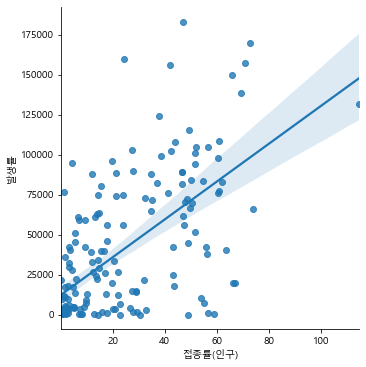

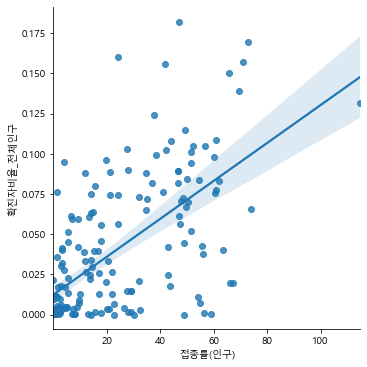

In [46]:
sns.lmplot(x='접종률(인구)', y='발생률', data=df_corona_all_n)
sns.lmplot(x='접종률(인구)', y='확진자비율_전체인구', data=df_corona_all_n)

In [47]:
df_corona_all_n.corr()['접종률(인구)']['발생률']

0.6230457738251627

In [48]:
df_corona_all_n.corr()['접종률(인구)']['확진자비율_전체인구']

0.6230857378719435